In [104]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [105]:
csv = 'https://raw.githubusercontent.com/gaurav15raj/Time_Series-Econs-/main/AR%20Processes/output.csv'
df = pd.read_csv(csv,on_bad_lines='skip')
x = df.Prices.values

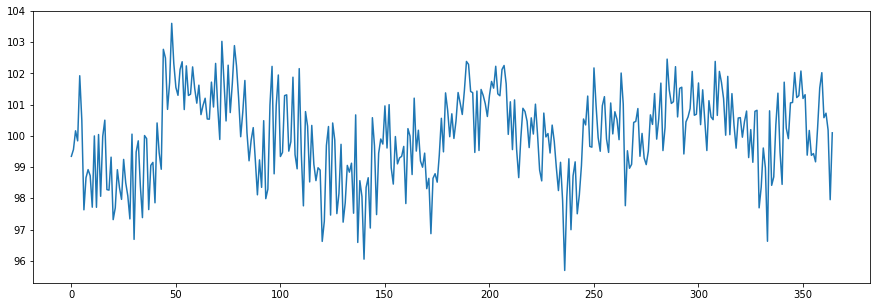

In [106]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(x)

In [107]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

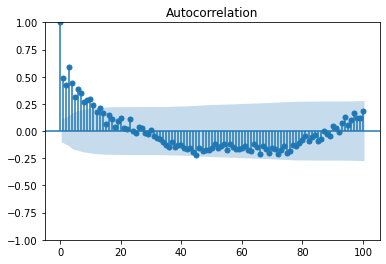

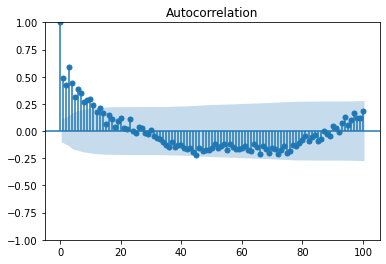

In [108]:
plot_acf(x, lags= 100)

C:\Users\sacha\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


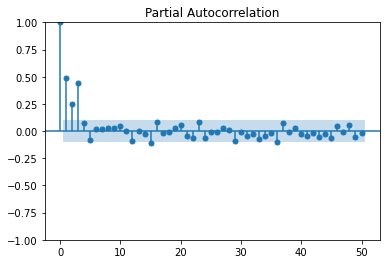

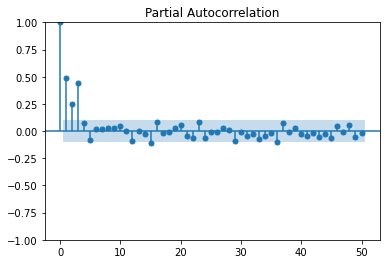

In [109]:
plot_pacf(x, lags= 50)

## through 50 lag pacf we can conclude that the proccess is of the order 3

In [110]:
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(x, lags = 3).fit()
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:                     AutoReg(3)   Log Likelihood                -536.856
Method:               Conditional MLE   S.D. of innovations              1.066
Date:                Sun, 12 Feb 2023   AIC                           1083.712
Time:                        23:05:16   BIC                           1103.170
Sample:                             3   HQIC                          1091.447
                                  365                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5232      4.972      4.329      0.000      11.778      31.269
y.L1           0.2625      0.047      5.559      0.000       0.170       0.355
y.L2           0.0807      0.049      1.637      0.102      -0.016       0.177
y.L3           0.4416      0.047      9.315      0.000       0.349       0.535
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1125           -0.0000j            1.1125           -0.0000
AR.2           -0.6476           -1.2712j            1.4266           -0.3250
AR.3           -0.6476           +1.2712j            1.4266            0.3250
-----------------------------------------------------------------------------
"""

In [111]:
pred = ar_model.predict(start=0, end=(len(x)-1), dynamic=False)

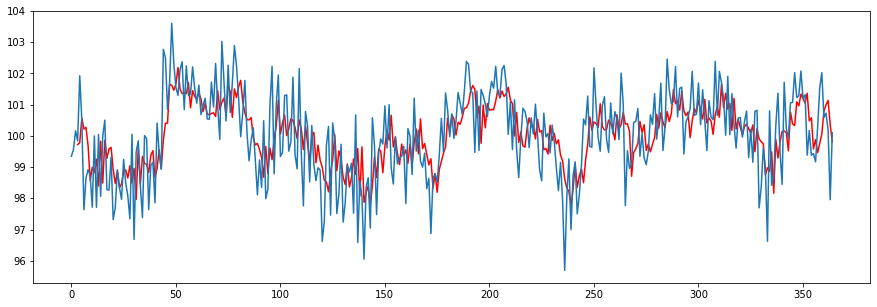

In [112]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(pred,'r')
plt.plot(x)

## predictions and r2 score

In [113]:
from sklearn.metrics import r2_score
r2 = r2_score(x[3:], pred[3:])
print("r2 score is ", r2)

r2 score is  0.4238535141983324


## prediction for the next 30 days

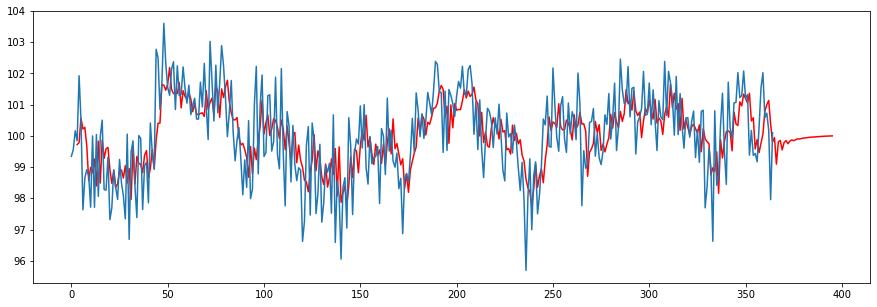

In [114]:
pred = ar_model.predict(start=0, end=(len(x)+30), dynamic=False)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(pred,'r')
plt.plot(x)

bruh the graph levels off after a while :/